## Question 1
# a)
We can approximate a derivative with two points using a derivative to the left, and one to the right using 
\begin{equation*}
f'(x) = \frac{f(x+\delta)-f(x-\delta)}{2\delta},
\end{equation*}
or
\begin{equation*}
f'(x) = \frac{f(x+2\delta)-f(x-2\delta)}{4\delta},
\end{equation*}

In this problem, I will use the four points $x\pm\delta$ and $x\pm 2\delta$ to approximate the derivative,

To approximate this, we can Taylor expand it: $f(x\pm\delta) = f(x) \pm \delta f'(x) + \frac{1}{2}\delta^2f''(x) \pm \frac{1}{3!}\delta^3f'''(x) + \frac{1}{4!}\delta^4f^{(4)}(x)\pm\frac{1}{5!}\delta^5f^{(5)}(x)+...$

Similarly, for $f(x\pm 2\delta)$: $f(x\pm 2\delta) = f(x) \pm 2\delta f'(x) + \frac{2^2}{2}\delta^2f''(x) \pm \frac{2^3}{3!}\delta^3f'''(x) + \frac{2^4}{4!}\delta^4f^{(4)}(x)\pm\frac{2^5}{5!}\delta^5f^{(5)}(x)+...$


This is awful, but we can cancel out some terms: all the non $\pm$ terms will go away if we do $f(x+\delta) - f(x-\delta)$ and $f(x+2\delta)-f(x-2\delta)$ so let's do it. We have:

\begin{equation}
f(x+\delta) - f(x-\delta) \approx 2\delta f'(x) + \frac{1}{3}\delta^3f'''(x) + \frac{1}{60}\delta^5f^{(5)}(x),
\end{equation}

and

\begin{equation}
f(x+2\delta)-f(x-2\delta) = 4\delta f'(x) + \frac{8}{3}\delta^3f'''(x) + \frac{8}{15}\delta^5f^{(5)}(x),
\end{equation}

where I have truncated after the 5th order. We can get a better estimate of $f'(x)$ if we manage to cancel out the $f'''(x)$ term. We need a linear combination of the two derivatives such that: 
\begin{equation}
a\left(\frac{f(x+\delta)-f(x-\delta)}{2\delta}\right) + b\left(\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\right) = \delta f'(x) + c\delta^5f^{(5)}(x)
\end{equation}

Putting Equations (1) and (2) in this gives:
\begin{align*}
a \left(f'(x) + \frac{1}{6}\delta^2f'''(x) + \frac{1}{120}\delta^4f^{(5)}(x)\right) + b\left(\delta f'(x) + \frac{2}{3}\delta^3f'''(x) + \frac{2}{15}\delta^5f^{(5)}(x)\right) \\
= \delta f'(x) + c\delta^5f^{(5)}(x).
\end{align*}

This gives the system of equations: 
\begin{equation*}
\frac{a}{6} + \frac{2b}{3} = 0
\end{equation*}

\begin{equation*}
a+b = 1
\end{equation*}

Which has solutions $a = 4/3$ and $b = -1/3$, and this sets $c$ to be $-1/30$. Plugging these values in Equation (3) yields:
\begin{equation*}
\frac{4}{3}\left(\frac{f(x+\delta)-f(x-\delta)}{2\delta}\right) - \frac{1}{3}\left(\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\right) = f'(x) - \frac{1}{30}\delta^4f^{(5)}(x),
\end{equation*}
and we can solve for $f'(x)$:
\begin{equation}
f'(x) = \frac{8(f(x+\delta)-f(x-\delta))- (f(x+2\delta)-f(x-2\delta))}{12\delta} +\frac{1}{30}\delta^4f^{(5)}(x).
\end{equation}

The first term is our estimate of the derivative, while the second term ($\Delta = \frac{1}{30}\delta^4f^{(5)}(x)$) is the error.

# b)

Now, to find the best $\delta$ possible we need to take into consideration the machine error, which I've ignored until now. Im general, when considering the machine precision ($\epsilon$), we get terms like $g_1
\epsilon f(x)/2\delta$ for Equation (1) and $g_2 \epsilon f(x)/4\delta$ for Equation (2). If we combine these terms together in the same linear combination as in (a) and add them to the error $\Delta$, we get 

\begin{equation}
\Delta = \frac{1}{30}\delta^4f^{(5)}(x) + \frac{\epsilon g}{\delta}f(x),
\end{equation}
where I've combined the $g_1$, $g_2$, and all the other constants into $g$. This is our error on the derivative, and what we want to minimize with respect to $\delta$. So let's take the derivative and set it to zero:
\begin{equation*}
\frac{d\Delta}{d\delta} = \frac{4}{30}\delta^3f^{(5)}(x) - \frac{\epsilon g}{\delta^2}f(x) = 0,
\end{equation*}

\begin{equation*}
\frac{4}{30}\delta^3f^{(5)}(x)  = \frac{\epsilon g}{\delta^2}f(x) 
\end{equation*}

\begin{equation*}
\delta^5 = \frac{15\epsilon g}{2}\frac{f(x)}{f^{(5)}(x)}
\end{equation*}

\begin{equation}
\delta \approx \left(\frac{15\epsilon}{2}\frac{f(x)}{f^{(5)}(x)}\right)^{1/5}
\end{equation}

Since we work with exponentials in this question, we can set $f(x)/f^{5}(x) \approx 1$ since the derivatives of the exponentials look a lot like the exponentials. This gives us
\begin{equation}
\delta \approx \left(\frac{15\epsilon}{2}\right)^{1/5},
\end{equation}
and for double digit precision, $\epsilon = 1e16$. Demonstrations of this below and in q1.ipynb.


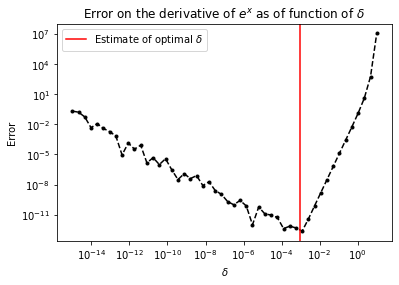

The estimated optimal delta is 0.0009440875112949016 . We can see in the plot above that it is quite close to the delta that gives us the smallest error.


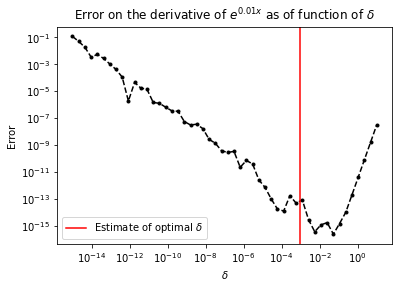

The estimated optimal delta is again 0.0009440875112949016 . This time it is much worse, the best delta is around 1e-1.
This is because when we differentiate exp(0.01x), we pull down factors of 0.01. This makes it so f(x)/f^(5)(x) = 1 is not a good approximation anymore.


In [15]:
# Question 1 b)

import numpy as np
import matplotlib.pyplot as plt


def f1(x):
    return np.exp(x)

def f2(x):
    return np.exp(0.01*x)

def derivative1(x, dx, f):
    return (8*(f(x+dx)-f(x-dx))-(f(x+2*dx)-f(x-2*dx)))/(12*dx)


# Evaluating derivatives and errors
diff_approx1 = derivative1(1, np.logspace(-15, 1, num=50), f1)
diff_true1 = np.exp(1) 

diff_approx2 = derivative1(1, np.logspace(-15, 1, num=50), f2)
diff_true2 = 0.01*np.exp(0.01*1)

error1 = np.abs(diff_approx1-diff_true1)
error2 = np.abs(diff_approx2 -diff_true2)

dx = np.logspace(-15, 1, num=50)
eps = 1e-16 # double point precision 

# estimate of optimal delta
delta = np.power(15*eps/2,1/5)

# Plotting stuff
plt.plot(dx, error1, 'k.--')
plt.title('Error on the derivative of $e^x$ as of function of $\delta$')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$\delta$')
plt.ylabel('Error')
plt.axvline(x = delta, label = 'Estimate of optimal $\delta$', color = 'r')
plt.legend()
plt.show()
print('The estimated optimal delta is', delta, '. We can see in the plot above that it is quite close to the delta that gives us the smallest error.')

plt.plot(dx, error2, 'k.--')
plt.title('Error on the derivative of $e^{0.01x}$ as of function of $\delta$')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$\delta$')
plt.ylabel('Error')
plt.axvline(x = delta, label = 'Estimate of optimal $\delta$', color = 'r')
plt.legend()
plt.show()
print('The estimated optimal delta is again', delta, '. This time it is much worse, the best delta is around 1e-1.')
print('This is because when we differentiate exp(0.01x), we pull down factors of 0.01. This makes it so f(x)/f^(5)(x) = 1 is not a good approximation anymore.')